# Trabajo Práctico N° 1: Árboles de Decisión



[Text(0.375, 0.875, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.25, 0.375, 'X[3] <= 1.55\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.75, 0.375, 'X[3] <= 1.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'entropy = 0.503\nsamples = 9\nvalue = [0, 1, 8]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

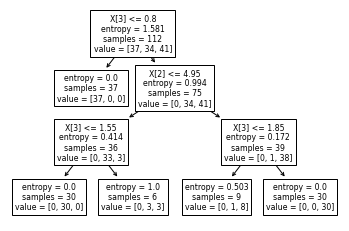

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
tree.plot_tree(clf)


## Ejercicio 1

Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

<AxesSubplot:title={'center':'Train Set Size: 3000'}, xlabel='x', ylabel='y'>

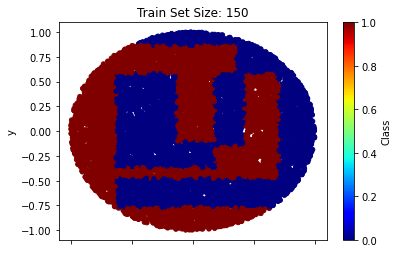

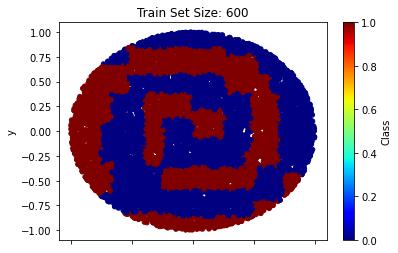

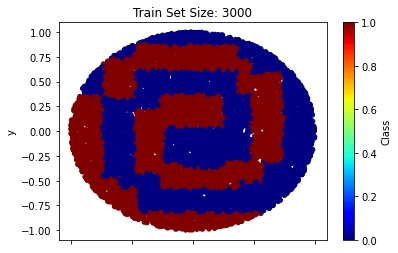

In [61]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# La función que genera puntos para el problema de las espirales anidadas.

# Las funciones que representan nuestras curvas
def curve1(theta):
    return theta / (4 * math.pi)

def curve2(theta):
    return (theta + math.pi) / (4 * math.pi)

def generate_points_c(n):
    
    len0 = n // 2
    len1 = n - len0

    class0 = 0
    class1 = 0

    # Radio y centro del circulo
    radius = 1
    x, y = (0, 0)

    # Guardamos las coordenadas x e y respectivamente
    xs = []
    ys = []

    clases = []
    # Tamaño random de puntos a generar
    # for i in range(0, n):
    while (class0 < len0) or (class1 < len1):
    # random.random() devuelve numeros entre 0.0 y 1.0
        theta = 2 * math.pi * random.random()
        r = radius * math.sqrt(random.random())

        # clase = 0
        # Sumando de a 0.5 vamos dando vuelta alrededor de todo el espiral (esto 
        # se puede ver analizando una gráfica de la curva1) y vemos 
        # si el radio cae en alguna de las franjas correctas, y de ser así
        # le asignamos la clase 1 a ese punto, en caso contrario esta permanecerá
        # en 0.
        flag = False
        for theta0 in [theta + (2 * math.pi * i) for i in range(-1, 6)]:
            if (curve1(theta0) < r and r < curve2(theta0)):
                if class1 < len1:
                    class1 += 1
                    # Convertimos las coordenadas polares a cartesianas y almacenamos.
                    xs.append(r * math.cos(theta) + x)
                    ys.append(r * math.sin(theta) + y)
                    # Guadamos la clase correspondiente al punto generado.
                    clases.append(1)
                flag = True
                continue
        if class0 < len0 and not flag:
            class0 += 1
            # Convertimos las coordenadas polares a cartesianas y almacenamos.
            xs.append(r * math.cos(theta) + x)
            ys.append(r * math.sin(theta) + y)
            # Guadamos la clase correspondiente al punto generado.
            clases.append(0)

    # Generamos el dataframe
    points = {'x': xs, 'y': ys, 'Class': clases}
    df = pd.DataFrame(points)
    return df

# Ahora generamos conjuntos de entrenamiento de longitud 150, 600 y 3000

train_150 = generate_points_c(150)
train_600 = generate_points_c(600)
train_3000 = generate_points_c(3000)

Xtrain_150, ytrain150 = train_150.loc[ : , ['x', 'y'] ], train_150.loc[:, 'Class']
Xtrain_600, ytrain600 = train_600.loc[ : , ['x', 'y'] ], train_600.loc[:, 'Class']
Xtrain_3000, ytrain3000 = train_3000.loc[ : , ['x', 'y'] ], train_3000.loc[:, 'Class']

test_set = generate_points_c(10000)

clf150 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf600 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf3000 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)

# Entrenamos y observamos los datos para el conjunto de testeo de 150
clf150.fit(Xtrain_150, ytrain150)
p150 = clf150.predict(test_set.loc[ : , ['x', 'y'] ])
df150 = test_set.loc[ : , ['x', 'y'] ]
df150['Class'] = p150
df150.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title="Train Set Size: 150")

# Entrenamos y observamos los datos para el conjunto de testeo de 600
clf600.fit(Xtrain_600, ytrain600)
p600 = clf600.predict(test_set.loc[ : , ['x', 'y'] ])
df600 = test_set.loc[ : , ['x', 'y'] ]
df600['Class'] = p600
df600.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title="Train Set Size: 600")

# Entrenamos y observamos los datos para el conjunto de testeo de 3000
clf3000.fit(Xtrain_3000, ytrain3000)
p3000 = clf3000.predict(test_set.loc[ : , ['x', 'y'] ])
df3000 = test_set.loc[ : , ['x', 'y'] ]
df3000['Class'] = p3000
df3000.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title="Train Set Size: 3000")


Recordemos que la figura original de nuestro TP anterior era la siguiente

<AxesSubplot:xlabel='x', ylabel='y'>

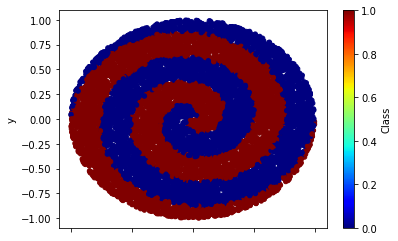

In [62]:
df = generate_points_c(10000)
df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')

Para el conjunto de datos de tamaño 150 la figura generada prácticamente no se asemeja, mientras que para los conjuntos de tamaño 600 y 3000 se logra ver un acercamiento al parecido de la figura original. 

Claramente, la conclusión que podemos obtener de aquí es que nuestro modelo necesita una cantidad considerable de datos de entrenamiento para poder lograr una mejor predicción con el conjunto de testeo.

## Ejercicio 2

Dependencia con la longitud del conjunto de entrenamiento - Sobreajuste:

Genere datasets usando el código desarrollado en el punto a) de la práctica 0 (vamos a llamar a estos datos "diagonal", y a los descriptos en el punto b) "paralelo"), con C = 0.78 y d = 2. Genere un único conjunto de test con n = 10000. Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.
También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.

Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.

## Gráfica sobre las predicciones

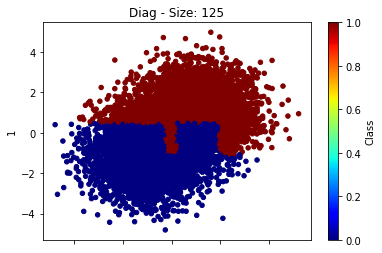

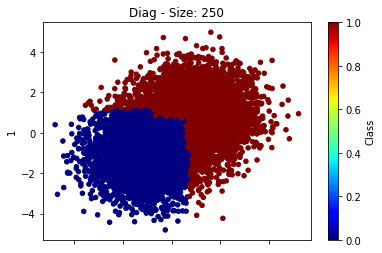

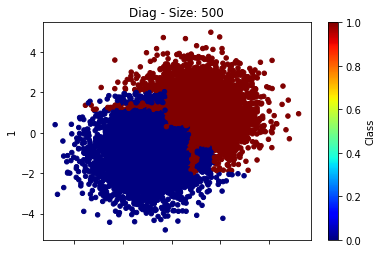

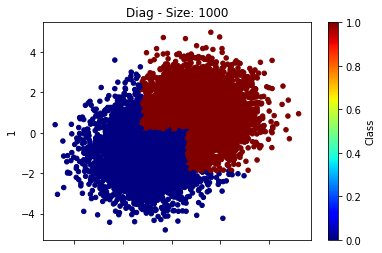

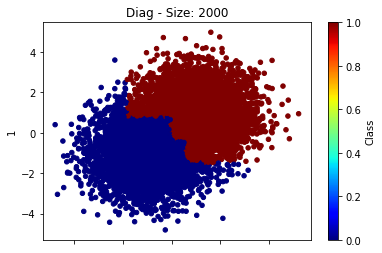

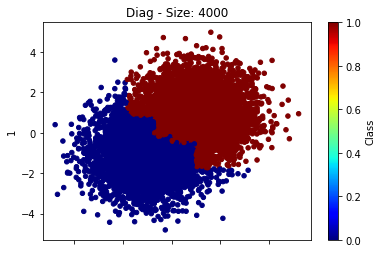

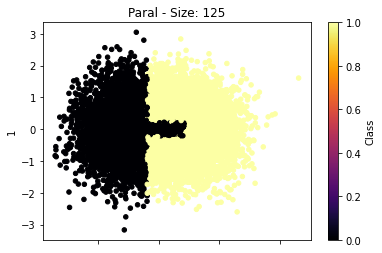

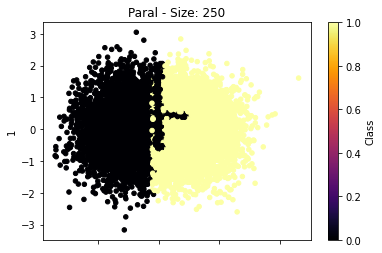

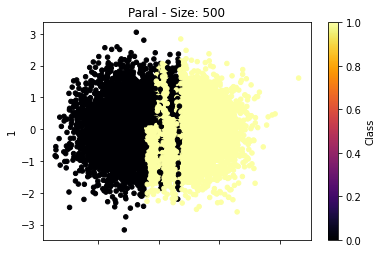

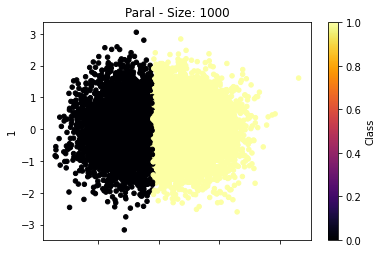

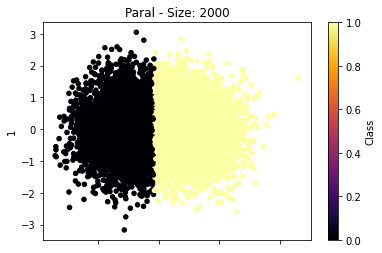

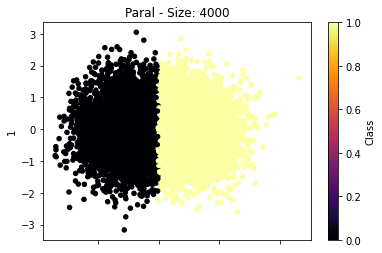

In [63]:
import pandas as pd
import numpy as np
from math import sqrt
import math
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score

def generate_dataframe(d: int, n: int, deviation: float, center0: List[int], center1: List[int]):    
    m = [deviation**2] * d
    # Generamos los n/2 puntos de la clase 0
    data0 = np.random.multivariate_normal(center0, np.diag(m), n//2)  
    # Generamos los n/2 puntos de la clase 1
    data1 = np.random.multivariate_normal(center1, np.diag(m), math.ceil(n/2))  


    # Concatenamos ambos arrays, primero colocamos los puntos correspondientes a 
    # la clase 0 y luego los correspondientes a la clase 1 así luego no es más
    # fácil clasificarlos.
    data = np.concatenate((data0, data1), axis=0)

    # Generamos las columnas que representarán las coordenadas de cada punto.
    cols = list(map(str, list(range(d))))
    # Generamos el dataframe
    df = pd.DataFrame(data, columns=cols)
    # Agregamos al final del dataframe la columna que representa la clase de
    # cada punto.
    df['Class'] = ([0] * (n // 2)) + ([1] * (math.ceil(n/2)))
    
    return df

def generate_dataframe_a(d: int, n: int, C: float): 
    deviation = C * sqrt(d)
    c0 = [-1] * d
    c1 = [1] * d
    return generate_dataframe(d, n, deviation, c0, c1)

def generate_dataframe_b(d: int, n: int, C: float):
    deviation = C
    c0 = [-1] + ([0] * (d - 1))
    c1 = [1] + ([0] * (d - 1))
    return generate_dataframe(d, n, deviation, c0, c1)

# Generamos nuestro conjunto de testeo
data_a = generate_dataframe_a(2, 10000, 0.78)
data_b = generate_dataframe_b(2, 10000, 0.78)

test_set_a = data_a.loc[ : , ['0', '1'] ]
y_test_set_a = data_a.loc[:, 'Class']
test_set_b = data_b.loc[ : , ['0', '1'] ]
y_test_set_b = data_b.loc[:, 'Class']
# Valores de n
n_values = [125, 250, 500, 1000, 2000, 4000]

# Para guardar la info pedida en el enunciado
nn = []
train_errors_a = []
test_errors_a = []
tree_sizes_a = []
train_errors_b = []
test_errors_b = []
tree_sizes_b = []
# Guardamos un ejemplo de predicción de cada tamaño de n para luego graficarlo
predictions_a = {}
predictions_b = {}

# Generamos los 20 conjuntos de entrenamiento para cada n y guardamos la información
# pedida en el ejercicio para analizarla despues

for n in n_values:
    for i in range(0, 20):
        nn.append(n)
        # Generamos el conjunto de entrenamiento
        train_set_a = generate_dataframe_a(2, n, 0.78)
        Xtrain_a, ytrain_a = train_set_a.loc[ : , ['0', '1'] ], train_set_a.loc[:, 'Class']

        train_set_b = generate_dataframe_b(2, n, 0.78)
        Xtrain_b, ytrain_b = train_set_b.loc[ : , ['0', '1'] ], train_set_b.loc[:, 'Class']

        # Creamos el árbol y lo entrenamos
        clf_a = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_a.fit(Xtrain_a, ytrain_a)

        clf_b = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_b.fit(Xtrain_b, ytrain_b)
        # Guardamos el tamaño del árbol
        tree_sizes_a.append(clf_a.tree_.node_count)
        tree_sizes_b.append(clf_b.tree_.node_count)

        # Predecimos sobre el conjunto de testeo
        prediction_a = clf_a.predict(test_set_a)
        prediction_b = clf_b.predict(test_set_b)

        # Guardamos el error (1 - accuracy) sobre el conjunto de entrenamiento 
        # y sobre el conjunto de testeo.
        test_errors_a.append(1 - accuracy_score(y_test_set_a, prediction_a))
        train_errors_a.append(1 - accuracy_score(ytrain_a, clf_a.predict(Xtrain_a)))

        test_errors_b.append(1 - accuracy_score(y_test_set_b, prediction_b))
        train_errors_b.append(1 - accuracy_score(ytrain_b, clf_b.predict(Xtrain_b)))

        # Si no tenemos un ejemplo de predicciones de este tamaño lo guardamos
        # para poder analizarlo luego.

        if n not in predictions_a.keys():
            predictions_a[n] = (test_set_a, prediction_a)

        if n not in predictions_b.keys():
            predictions_b[n] = (test_set_b, prediction_b)

# Graficamos un conjunto de cada tamaño con su respectiva predicción
for size in predictions_a.keys():
    test_set, prediction = predictions_a[size]
    df_pred = test_set
    df_pred['Class'] = prediction
    df_pred.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet', title=f"Diag - Size: {size}")

for size in predictions_b.keys():
    test_set, prediction = predictions_b[size]
    df_pred = test_set
    df_pred['Class'] = prediction
    df_pred.plot(x=0, y=1, kind='scatter', c='Class', colormap='inferno', title=f"Paral - Size: {size}")

### Análisis sobre el diagonal

Arriba podemos ver las gráficas de los resultados sobre el conjunto de testeo para los conjuntos de entrenamiento de tamaño 125, 250, 500, 1000, 2000 y 4000 respectivamente.

Podemos ver que a medida que aumenta el tamaño del conjunto de entrenamiento, la disposición de los puntos mejora aunque ligeramente.

En el ejercicio anterior, la mejora era significativa con respecto a los tamaños del conjunto de entrenamiento, pero en este caso no hay una diferencia muy grande entre los distintos tamaños de N.

### Análisis sobre el paralelo

Sobre las gráficas generadas arriba, podemos observar que hasta N = 500 no hay una separación clara de los puntos, mientras que a partir de N = 1000 estos ya parecen estar casi separados justo en la mitad de la figura. A comparación de las figuras del diagonal acá la diferencia si es más significativa a medida que aumenta el N hasta N = 1000, luego va mejorando pero ligeramente.

## Gráfica sobre el training error y el test error

Text(0, 0.5, 'Error')

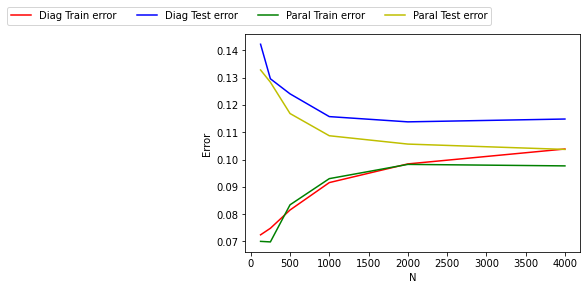

In [64]:
# Gráfica de training error y test error
import matplotlib.pyplot as plt

df_a = pd.DataFrame({})
df_a['N'] = nn
df_a['Nodes'] = tree_sizes_a
df_a['TrError'] = train_errors_a
df_a['TeError'] = test_errors_a

df_b = pd.DataFrame({})
df_b['N'] = nn
df_b['Nodes'] = tree_sizes_b
df_b['TrError'] = train_errors_b
df_b['TeError'] = test_errors_b

mean_train_error_a = df_a.groupby('N')['TrError'].mean().to_numpy()
mean_test_error_a = df_a.groupby('N')['TeError'].mean().to_numpy()

mean_train_error_b = df_b.groupby('N')['TrError'].mean().to_numpy()
mean_test_error_b = df_b.groupby('N')['TeError'].mean().to_numpy()

error_df_a = pd.DataFrame({})
error_df_a['Nodes'] = n_values
error_df_a['TrError'] = mean_train_error_a
error_df_a['TeError'] = mean_test_error_a

error_df_b = pd.DataFrame({})
error_df_b['Nodes'] = n_values
error_df_b['TrError'] = mean_train_error_b
error_df_b['TeError'] = mean_test_error_b

fig = plt.plot(error_df_a['Nodes'], error_df_a['TrError'], 'r')
fig = plt.plot(error_df_a['Nodes'], error_df_a['TeError'], 'b')
fig = plt.plot(error_df_b['Nodes'], error_df_b['TrError'], 'g')
fig = plt.plot(error_df_b['Nodes'], error_df_b['TeError'], 'y')
plt.legend(['Diag Train error', 'Diag Test error', 'Paral Train error', 'Paral Test error'], bbox_to_anchor=(0.75, 1.15), ncol=4)
plt.xlabel("N")
plt.ylabel("Error")


Podemos ver que en el caso del problema diagonal el error de testeo es mayor que en el del paralelo. Sin embargo, los errores de entrenamiento de ambos problemas se 'cruzan' siendo por momentos mayor el error de entrenamiento del diagonal, y por otros el del paralelo.

En ambos problemas el error de entrenamiento se mantuvo por debajo del de testeo por lo que a simple vista no parecia haber *overfitting*.

## Gráfica de la cantidad de nodos del árbol en funcion de N

Text(0, 0.5, 'Nodes')

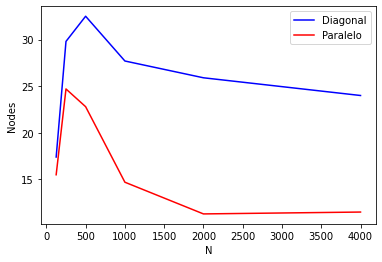

In [65]:
import matplotlib.pyplot as plt

# Gráfica de la cantidad de nodos del árbol en función de la longitud del conjunto de entrenamiento

df_a = pd.DataFrame({})
df_a['N'] = nn
df_a['Nodes'] = tree_sizes_a
df_a['TrError'] = train_errors_a
df_a['TeError'] = test_errors_a

df_b = pd.DataFrame({})
df_b['N'] = nn
df_b['Nodes'] = tree_sizes_b
df_b['TrError'] = train_errors_b
df_b['TeError'] = test_errors_b

# Calculamos el promedio de cantidad de nodos de acuerdo a cada tamaño de conjunto
mean_node_size_a = df_a.groupby('N')['Nodes'].mean().to_numpy()
mean_node_size_b = df_b.groupby('N')['Nodes'].mean().to_numpy()
# Creamos el dataframe con los datos 'acomodados' para poder hacer el gráfico
mean_df_a = pd.DataFrame({})
mean_df_a['N'] = n_values
mean_df_a['Nodes'] = mean_node_size_a

mean_df_b = pd.DataFrame({})
mean_df_b['N'] = n_values
mean_df_b['Nodes'] = mean_node_size_b
# mean_df_a.plot(x=0, y=1, kind='scatter', colormap='jet')
plt.plot(mean_df_a['N'], mean_df_a['Nodes'], 'b')
plt.plot(mean_df_b['N'], mean_df_b['Nodes'], 'r')
plt.legend(['Diagonal', 'Paralelo'])
plt.xlabel('N')
plt.ylabel('Nodes')


Podemos observar en la gráfica que la cantidad de nodos para el árbol generado en el problema del diagonal, es mayor a la del paralelo. De todas formas, podemos ver que ambas tienen la misma tendencia de aumentar la cantiad de nodos hasta cierto punto (N = 500 para el diagonal y N = 250 para el paralelo), y partir de allí comienza a disminuir.

## Ejercicio 3

Resistencia al ruido:


Genere datasets con d = 5, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando el valor de C (overlapping de las clases) de 0.5 a 2.5 con incrementos de 0.5. Como en el punto anterior, para cada valor dado de C cree 20 conjuntos distintos de entrenamiento, pero uno solo de test. Genere una gráfica del test-error en función de C para el problema "paralelo" y el "diagonal" (sólo los promedios de los 20 conjuntos para cada valor de C). También incluya en la gráfica los valores mínimos que se piden en el opcional 6.1 (el que no haga el opcional me los puede pedir a mi). Todos los resultados de los dos problemas y el error mínimo en la misma gráfica. Discuta los resultados.

Text(0, 0.5, 'Error')

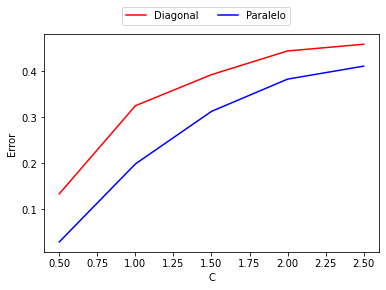

In [66]:
import pandas as pd
import numpy as np
from math import sqrt
import math
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score

cs = []
C = 0.5

# Generamos los valores de C
while C <= 2.5:
    cs.append(C)
    C += 0.5

test_errors_a = []
test_errors_b = []

cc = []
for c in cs:
    # Generamos un único conjunto de testeo para cada valor de C
    test_a = generate_dataframe_a(d = 5, n = 10000, C = c)
    test_set_a = test_a.loc[ : , ['0', '1'] ]
    y_test_set_a = test_a.loc[:, 'Class']

    test_b = generate_dataframe_b(d = 5, n = 10000, C = c)
    test_set_b = test_b.loc[ : , ['0', '1'] ]
    y_test_set_b = test_b.loc[:, 'Class']
    for i in range(0, 20):
        cc.append(c)
        
        # Generamos el conjunto de entrenamiento
        train_set_a = generate_dataframe_a(d = 5, n = 250, C = c)
        train_set_b = generate_dataframe_b(d = 5, n = 250, C = c)

        # Creamos el árbol y lo entrenamos
        Xtrain_a, ytrain_a = train_set_a.loc[ : , ['0', '1'] ], train_set_a.loc[:, 'Class']
        clf_a = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_a.fit(Xtrain_a, ytrain_a)

        Xtrain_b, ytrain_b = train_set_b.loc[ : , ['0', '1'] ], train_set_b.loc[:, 'Class']
        clf_b = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_b.fit(Xtrain_b, ytrain_b)

        # Predecimos sobre el conjunto de testeo
        prediction_a = clf_a.predict(test_set_a)
        prediction_b = clf_b.predict(test_set_b)

        # Guardamos el error (1 - accuracy) sobre el conjunto de testeo.
        test_errors_a.append(1 - accuracy_score(y_test_set_a, prediction_a))
        test_errors_b.append(1 - accuracy_score(y_test_set_b, prediction_b))

# Creamos los dataframes con cada valor de C y su respectivo error (20 errores por cada N habrá)
df_a = pd.DataFrame({})
df_a['C'] = cc
df_a['Error'] = test_errors_a

df_b = pd.DataFrame({})
df_b['C'] = cc
df_b['Error'] = test_errors_b

# Agrupamos y calculamos el promedio de error para cada valor de C
mean_test_error_a = df_a.groupby('C')['Error'].mean().to_numpy()
mean_test_error_b = df_b.groupby('C')['Error'].mean().to_numpy()

# Guardamos los resultados obtenidos en los dataframes
error_df_a = pd.DataFrame({})
error_df_a['C'] = cs
error_df_a['Error'] = mean_test_error_a

error_df_b = pd.DataFrame({})
error_df_b['C'] = cs
error_df_b['Error'] = mean_test_error_b

# Graficamos
plt.plot(error_df_a['C'], error_df_a['Error'], 'r')
plt.plot(error_df_b['C'], error_df_b['Error'], 'b')
plt.legend(['Diagonal', 'Paralelo'], bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.xlabel('C')
plt.ylabel('Error')

### ANALISIS

### Ejercicio 3.1 (opcional)

(completar xd)

## Ejercicio 4

Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.

Text(0, 0.5, 'Error')

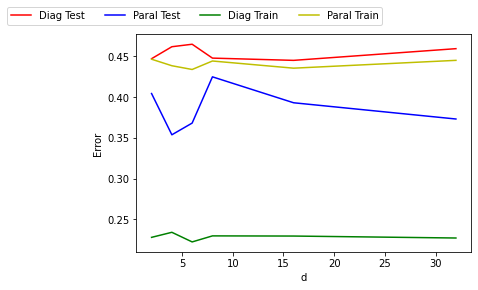

In [67]:
import pandas as pd
import numpy as np
from math import sqrt
import math
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score

ds = [2, 4, 6, 8, 16, 32]

test_errors_a = []
test_errors_b = []
train_errors_a = []
train_errors_b = []

dd = []
for d in ds:
    for i in range(0, 20):
        dd.append(d)
        # Generamos el conjunto de testeo
        test_a = generate_dataframe_a(d = d, n = 10000, C = 0.78)
        test_set_a = test_a.loc[ : , ['0', '1'] ]
        y_test_set_a = test_a.loc[:, 'Class']

        test_b = generate_dataframe_b(d = d, n = 10000, C = 0.78)
        test_set_b = test_b.loc[ : , ['0', '1'] ]
        y_test_set_b = test_b.loc[:, 'Class']
        # Generamos el conjunto de entrenamiento
        train_set_a = generate_dataframe_a(d = 5, n = 250, C = c)
        train_set_b = generate_dataframe_b(d = 5, n = 250, C = c)

        # Creamos el árbol y lo entrenamos
        Xtrain_a, ytrain_a = train_set_a.loc[ : , ['0', '1'] ], train_set_a.loc[:, 'Class']
        clf_a = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_a.fit(Xtrain_a, ytrain_a)

        Xtrain_b, ytrain_b = train_set_b.loc[ : , ['0', '1'] ], train_set_b.loc[:, 'Class']
        clf_b = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf_b.fit(Xtrain_b, ytrain_b)

        # Predecimos sobre el conjunto de testeo
        prediction_a = clf_a.predict(test_set_a)
        prediction_b = clf_b.predict(test_set_b)
        prediction_train_a = clf_a.predict(train_set_a.loc[ : , ['0', '1']])
        prediction_train_b = clf_b.predict(train_set_a.loc[ : , ['0', '1']])

        # Guardamos el error (1 - accuracy) sobre el conjunto de testeo.
        test_errors_a.append(1 - accuracy_score(y_test_set_a, prediction_a))
        test_errors_b.append(1 - accuracy_score(y_test_set_b, prediction_b))
        train_errors_a.append(1 - accuracy_score(train_set_a.loc[:, 'Class'], prediction_train_a))
        train_errors_b.append(1 - accuracy_score(train_set_b.loc[:, 'Class'], prediction_train_b))

# Creamos los dataframes con cada valor de C y su respectivo error (20 errores por cada N habrá)
df_a = pd.DataFrame({})
df_a['d'] = dd
df_a['Test Error'] = test_errors_a
df_a['Train Error'] = train_errors_a

df_b = pd.DataFrame({})
df_b['d'] = dd
df_b['Test Error'] = test_errors_b
df_b['Train Error'] = train_errors_b

# Agrupamos y calculamos el promedio de error para cada valor de C
mean_test_error_a = df_a.groupby('d')['Test Error'].mean().to_numpy()
mean_test_error_b = df_b.groupby('d')['Test Error'].mean().to_numpy()
mean_train_error_a = df_a.groupby('d')['Train Error'].mean().to_numpy()
mean_train_error_b = df_b.groupby('d')['Train Error'].mean().to_numpy()
# Guardamos los resultados obtenidos en los dataframes
error_df_a = pd.DataFrame({})
error_df_a['d'] = ds
error_df_a['Test Error'] = mean_test_error_a
error_df_a['Train Error'] = mean_train_error_a

error_df_b = pd.DataFrame({})
error_df_b['d'] = ds
error_df_b['Test Error'] = mean_test_error_b
error_df_b['Train Error'] = mean_train_error_b

# Graficamos
plt.plot(error_df_a['d'], error_df_a['Test Error'], 'r')
plt.plot(error_df_b['d'], error_df_b['Test Error'], 'b')
plt.plot(error_df_a['d'], error_df_a['Train Error'], 'g')
plt.plot(error_df_b['d'], error_df_b['Train Error'], 'y')
plt.legend(['Diag Test', 'Paral Test', 'Diag Train', 'Paral Train'], bbox_to_anchor=(0.75, 1.15), ncol=4)
plt.xlabel('d')
plt.ylabel('Error')

Para el problema del diagonal podemos observar que el error de testeo es mayor que en el error en el problema del paralelo. Sin embargo, lo más interesante de observar en esta gráfica es como en el caso del problema del paralelo, el error del conjunto de entrenamiento llegó a ser mayor que el error en el conjunto de testeo, cuando en realidad uno esperaría que fuera al revés, como sucede en el caso del diagonal. Esto es indicio de que se produjo un *overfitting*.

## Ejercicio 5

Baje de los archivos al problema XOR. Grafique las clases. Observando el problema, indique cuál es el árbol más simple que clasifica correctamente todos los puntos. Aplique ahora un arbol con el siguiente setup DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 
sobre este problema, y explique el resultado obtenido.

Primero graficamos los datos para el archivo del problema XOR

<AxesSubplot:xlabel='x', ylabel='y'>

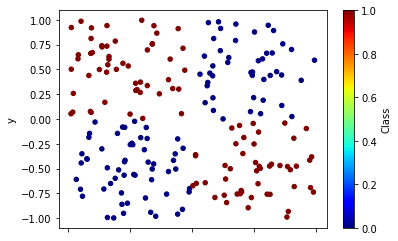

In [68]:
import pandas as pd

cols = ['x', 'y', 'Class']
df = pd.read_csv('xor.csv', names=cols)

ax = df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')
ax


Estimamos que un árbol correcto para este problema podría ser el siguiente:

```

         -------------root-----------
         |                          |
    ---x < 0 -                ----x > 0------
    |        |                |             |
   y < 0     y > 0         y < 0           y > 0 
    |           |           |                |
  c = 0       c = 1       c = 1             c = 0
```    

[Text(0.5, 0.5, 'entropy = 1.0\nsamples = 200\nvalue = [100, 100]')]

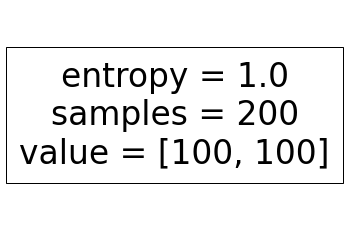

In [69]:
# Generamos el árbol
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
clf.fit(df.loc[:, ['x', 'y']], df.loc[:, ['Class']])

tree.plot_tree(clf)

El árbol generado con Python nos devuelve una única hoja donde podemos ver que la entropía es igual a 1. Esto quiere decir que se alcanzó la mayor medida de incertidumbre en el sistema, por lo que no pudo crear un árbol de desición para este problema.

El problema de XOR es conocido por ser un problema no lineal: si observamos la disposición de los puntos en la gráfica anterior, podemos ver que no existe una línea recta que se pueda trazar que divida las clases de datos dejando de un lado de la recta los de una clase y del otro lado de la recta los de la otra clase. Tal vez este hecho es una de las causas por la cual no se pudo construir el árbol de desición. 